In [1]:
from wearsed.dataset.Recording import Recording
import matplotlib.pyplot as plt
from lxml import etree
import pandas as pd

In [2]:
translate = {
    'Wake': 0,
    'NonREM1': 1,
    'NonREM2': 2,
    'NonREM3': 3,
    'REM': 5
}

def read_somnolyzer(mesa_id):
    root = etree.parse(f'/vol/sleepstudy/datasets/mesa/somnolyzer_scorings/mesa-sleep-{mesa_id:04}.rml').getroot()
    stages = []
    for child in root.find('{http://www.respironics.com/PatientStudy.xsd}ScoringData').find('{http://www.respironics.com/PatientStudy.xsd}StagingData').find('{http://www.respironics.com/PatientStudy.xsd}MachineStaging').find('{http://www.respironics.com/PatientStudy.xsd}NeuroAdultAASMStaging'):
        stages.append(child.attrib)

    hypnogram = pd.Series(0, index=range(int(stages[-1]['Start'])))

    for a, b in zip(stages, stages[1:]):
        stage = translate[a['Type']]
        start = int(a['Start'])
        end   = int(b['Start'])
        hypnogram[start:end] = stage
    
    return hypnogram

def comp_hypnogram(mesa_id):
    nsrr = Recording(mesa_id, signals_to_read=[]).hypnogram
    somnolyzer = read_somnolyzer(mesa_id)

    _, axs = plt.subplots(2, 1, figsize=(20, 4), sharex=True)

    nsrr.plot(ax=axs[0])
    somnolyzer.plot(ax=axs[1])

    axs[0].legend(['NSRR'], loc='upper right')
    axs[1].legend(['Somnolyzer'], loc='upper right')
    
    axs[0].grid()
    axs[1].grid()

    plt.tight_layout()
    plt.show()
    

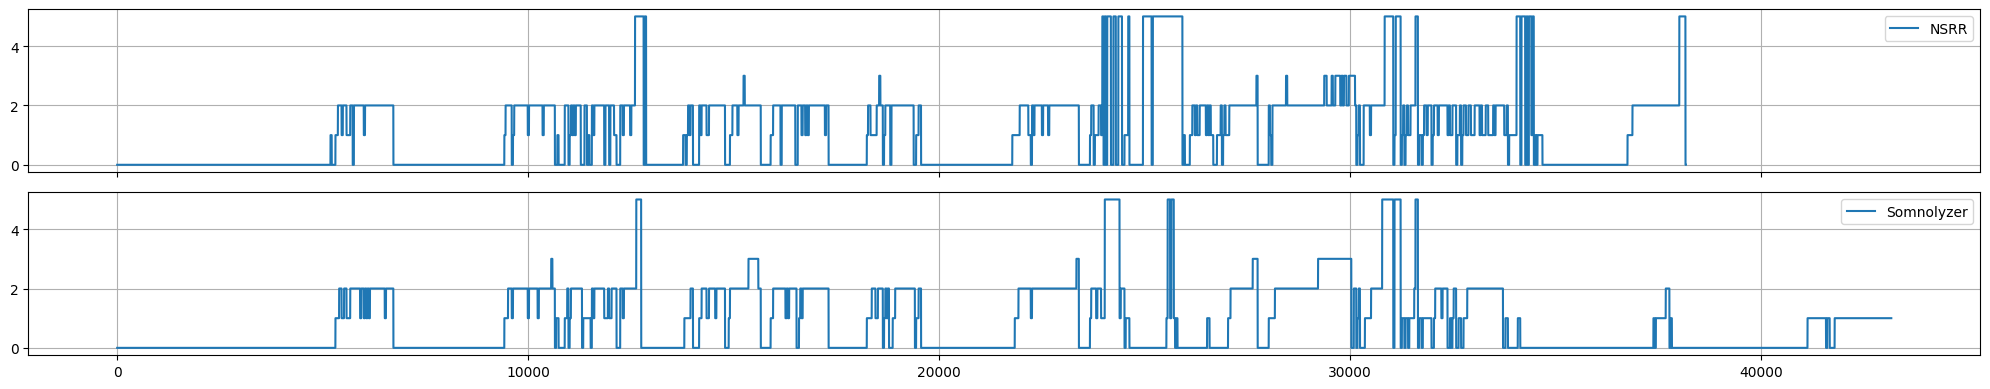

In [3]:
comp_hypnogram(1)

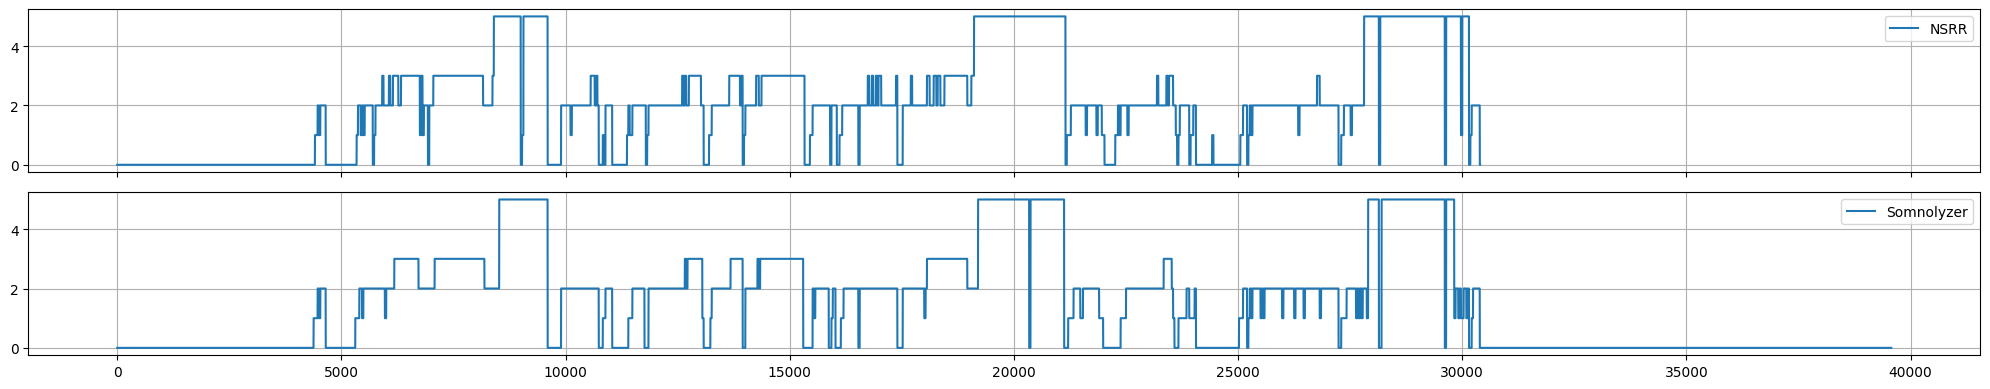

In [4]:
comp_hypnogram(2)

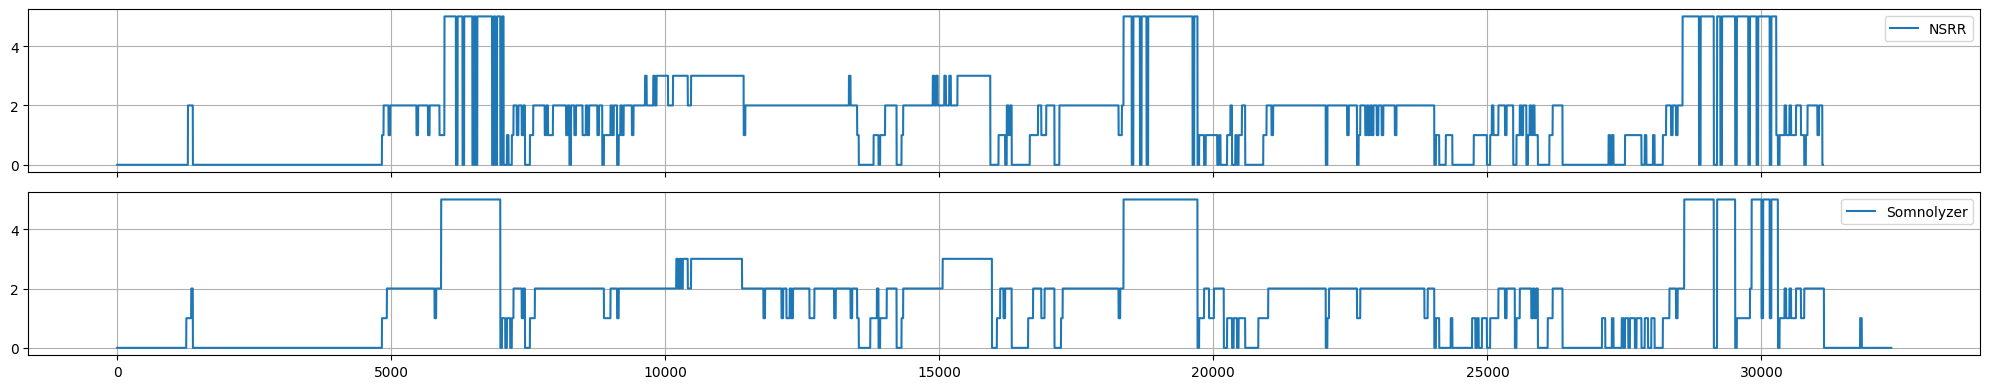

In [5]:
comp_hypnogram(6)

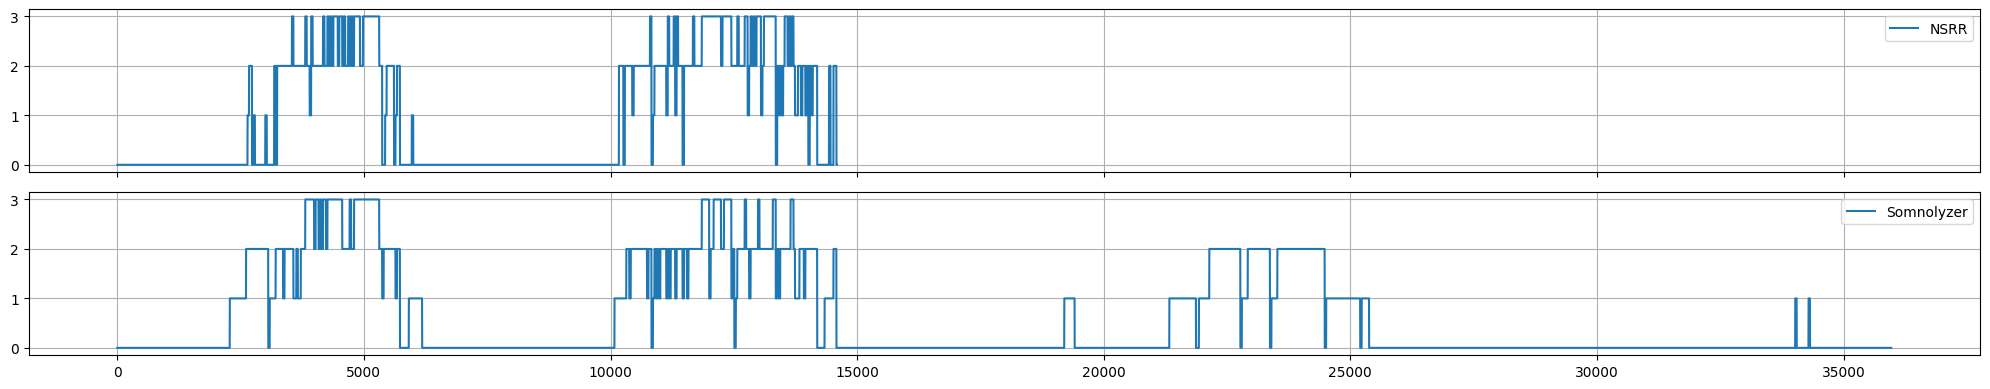

In [6]:
comp_hypnogram(10)

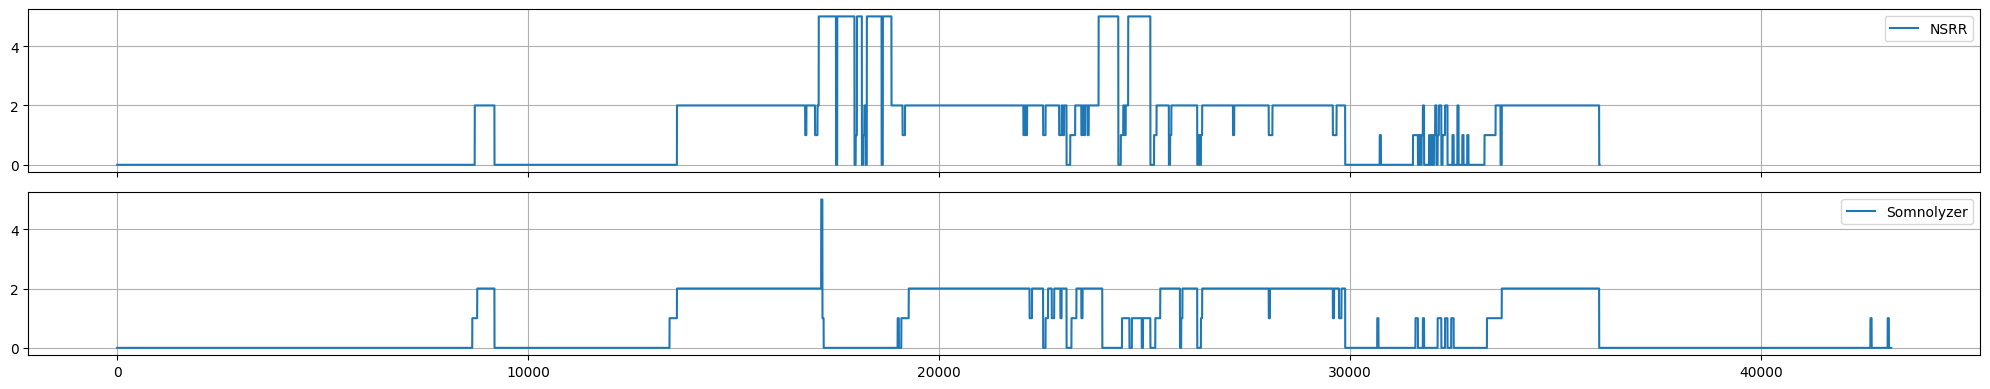

In [7]:
comp_hypnogram(6308)